<a href="https://colab.research.google.com/github/barbedorafael/Python_workshop_HGE/blob/main/python_Hietograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 HIDROLOGIA

 Ingrid Petry
 12/08/2021

##############################################################################################

 Hietograma de projeto 

 Você está participando do projeto de uma PCH e deve construir uma ensecadeira 
 para desviar o rio durante a obra. Estima-se que a construção irá durar 1 ano 
 e a probabilidade de haver galgamento da ensecadeira (falha) deve ser de apenas
 10%. O tempo de concentração da bacia até a PCH é de 8 horas e a área de 
 contribuição é 50 km2. **Estime o hietograma de projeto utilizando o método dos 
 blocos alternados.**

 Parâmetros da curva IDF: a=1000, b=0.15, c=12, d=0.7

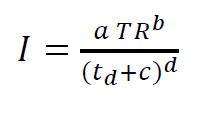

In [52]:
import pandas as pd
import matplotlib.pyplot as plt 

In [53]:
A = 50              # (km²)
f = 0.1             # falha de 10 %
d = 1               # duração da obra (anos)     
TR = 10             # (anos)
dt = 60             # (min)
tc = 8              # (horas)

# IDF 
a = 1000
b = 0.15
c = 12
d = 0.7

In [54]:
# "DataFrame is a 2-dimensional labeled data structure with columns of potentially different types"

# Nome novo do dataframe: dados

dados = pd.DataFrame()

print(dados)

Empty DataFrame
Columns: []
Index: []


In [55]:
# Organiza tabela com tempo em horas e minutos, Intensidade da chuva e volume de chuva por intervalo de tempo

dados['t(h)'] = pd.Series(range(1,tc+1))    # cria coluna os passos de tempo até o tempo de concentração da bacia 

print(dados)

   t(h)
0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8


In [56]:
dados['t(min)'] = dados['t(h)']*60

dados['I(mm/h)'] = a*(TR**b)/((dados['t(min)']+c)**d)    # Intensidade da chuva 

dados['h(mm)'] = dados['I(mm/h)'] * dados['t(h)']        # Volume de chuva 

print(dados)

   t(h)  t(min)    I(mm/h)       h(mm)
0     1      60  70.772943   70.772943
1     2     120  46.301840   92.603680
2     3     180  35.619608  106.858825
3     4     240  29.445547  117.782187
4     5     300  25.356645  126.783223
5     6     360  22.419191  134.515148
6     7     420  20.191165  141.338155
7     8     480  18.434206  147.473645


In [57]:
# Cálculo do incremento de chuva 

dados['Incremental'] = dados['h(mm)']

for x in dados['t(h)']:
  a = dados['t(h)'][x-1]     # t(h) = 1, a(1) = 0
  if a>1:
    dados.loc[a-1,'Incremental'] = dados['h(mm)'][a-1] - dados['h(mm)'][a-2]  

dados['blocos alternados'] = [4, 5, 3, 6, 2, 7, 8, 1]
# dados['blocos alternados'] = [5, 6, 4, 3, 7, 2, 8, 1] # outra possibilidade

print(dados)

   t(h)  t(min)    I(mm/h)       h(mm)  Incremental  blocos alternados
0     1      60  70.772943   70.772943    70.772943                  4
1     2     120  46.301840   92.603680    21.830737                  5
2     3     180  35.619608  106.858825    14.255145                  3
3     4     240  29.445547  117.782187    10.923362                  6
4     5     300  25.356645  126.783223     9.001037                  2
5     6     360  22.419191  134.515148     7.731924                  7
6     7     420  20.191165  141.338155     6.823007                  8
7     8     480  18.434206  147.473645     6.135490                  1


In [58]:
table = dados.sort_values('blocos alternados',ascending=True)
table = table.reset_index(drop=True) 

print(table)


   t(h)  t(min)    I(mm/h)       h(mm)  Incremental  blocos alternados
0     8     480  18.434206  147.473645     6.135490                  1
1     5     300  25.356645  126.783223     9.001037                  2
2     3     180  35.619608  106.858825    14.255145                  3
3     1      60  70.772943   70.772943    70.772943                  4
4     2     120  46.301840   92.603680    21.830737                  5
5     4     240  29.445547  117.782187    10.923362                  6
6     6     360  22.419191  134.515148     7.731924                  7
7     7     420  20.191165  141.338155     6.823007                  8


In [59]:
del table['t(h)']
del table['t(min)']
del table['I(mm/h)']
del table['h(mm)']
del table['blocos alternados']

table['t(h)'] = pd.Series(range(1,tc+1))       # cria coluna os passos de tempo
table['t(min)'] = table['t(h)']*60

print(table)

   Incremental  t(h)  t(min)
0     6.135490     1      60
1     9.001037     2     120
2    14.255145     3     180
3    70.772943     4     240
4    21.830737     5     300
5    10.923362     6     360
6     7.731924     7     420
7     6.823007     8     480


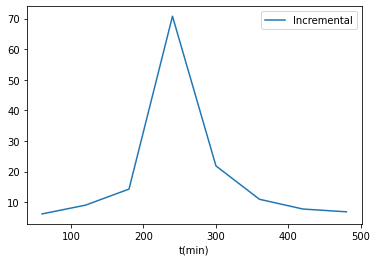

In [60]:
# Usando a função plot, temos o gráfico default:

# Nome novo do dataframe: table

table.plot('t(min)', 'Incremental')

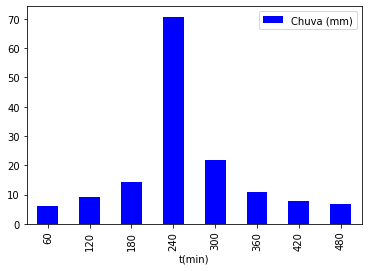

In [61]:
# Adicionando alguns elementos

table.plot('t(min)', 'Incremental', kind='bar', color='blue', label='Chuva (mm)')	


Text(0.5, 1.0, 'Hietograma')

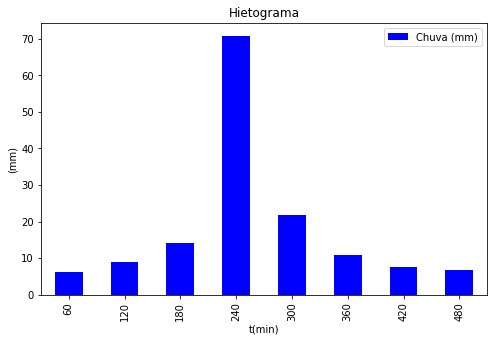

In [62]:
table.plot('t(min)', 'Incremental', kind='bar', color='blue', label='Chuva (mm)', figsize=(8,5))	

plt.xlabel('t(min)')

plt.ylabel('(mm)')

plt.title('Hietograma')